# Heart and related diseases study from Machine Learning Classification

## Import the librararies

In [313]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn
import matplotlib
from IPython.display import SVG

from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC



import random 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
 
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Activation, Dense

 
from keras.utils.vis_utils import plot_model
 
#from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K


from tensorflow.keras import Model
from keras import models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model


from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE



from pathlib import Path
import glob
import logging

from IPython.display import Image


In [314]:
KFold

sklearn.model_selection._split.KFold

In [315]:
############## Size For all the graphs
plt.rcParams['figure.figsize'] = (14,6)
#############

# READ IN THE DATA

In [316]:
for name in glob.glob('data/*.*'):
    print(name)


data/Jaccard_sets_A_and_B.svg.png
data/heart.csv.xls
data/diabetes.csv
data/o2Saturation.csv.xls
data/cardio_train.csv


In [317]:
heart = pd.read_csv('data/cardio_train.csv' ,sep=';', index_col = "id") 
heart.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [318]:
cardio = heart.copy() 

In [319]:
heart['BMI'] = heart['weight']/(np.power(heart['height']/100, 2))
heart['BMI'] = heart['BMI'].astype(int)
heart['age']= heart['age']/365
heart['age']= heart['age'].astype(int)
heart['cardio_disease'] = heart['cardio']
heart = heart.drop(columns = ['height','cardio','weight'])

In [320]:
 heart

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,cardio_disease
id,,,,,,,,,,,
0,50,2,110,80,1,1,0,0,1,21,0
1,55,1,140,90,3,1,0,0,1,34,1
2,51,1,130,70,3,1,0,0,0,23,1
3,48,2,150,100,1,1,0,0,1,28,1
4,47,1,100,60,1,1,0,0,0,23,0
...,...,...,...,...,...,...,...,...,...,...,...
99993,52,2,120,80,1,1,1,0,1,26,0
99995,61,1,140,90,2,2,0,0,1,50,1
99996,52,2,180,90,3,1,0,1,0,31,1


In [321]:
cardio.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [322]:
cardio.shape

(70000, 12)

In [323]:
df = heart.copy()
df

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,cardio_disease
id,,,,,,,,,,,
0,50,2,110,80,1,1,0,0,1,21,0
1,55,1,140,90,3,1,0,0,1,34,1
2,51,1,130,70,3,1,0,0,0,23,1
3,48,2,150,100,1,1,0,0,1,28,1
4,47,1,100,60,1,1,0,0,0,23,0
...,...,...,...,...,...,...,...,...,...,...,...
99993,52,2,120,80,1,1,1,0,1,26,0
99995,61,1,140,90,2,2,0,0,1,50,1
99996,52,2,180,90,3,1,0,1,0,31,1


In [324]:
 df

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,cardio_disease
id,,,,,,,,,,,
0,50,2,110,80,1,1,0,0,1,21,0
1,55,1,140,90,3,1,0,0,1,34,1
2,51,1,130,70,3,1,0,0,0,23,1
3,48,2,150,100,1,1,0,0,1,28,1
4,47,1,100,60,1,1,0,0,0,23,0
...,...,...,...,...,...,...,...,...,...,...,...
99993,52,2,120,80,1,1,1,0,1,26,0
99995,61,1,140,90,2,2,0,0,1,50,1
99996,52,2,180,90,3,1,0,1,0,31,1


In [325]:
df.columns

Index(['age', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'BMI', 'cardio_disease'],
      dtype='object')

In [326]:
#df = df.reset_index()

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             70000 non-null  int64
 1   gender          70000 non-null  int64
 2   ap_hi           70000 non-null  int64
 3   ap_lo           70000 non-null  int64
 4   cholesterol     70000 non-null  int64
 5   gluc            70000 non-null  int64
 6   smoke           70000 non-null  int64
 7   alco            70000 non-null  int64
 8   active          70000 non-null  int64
 9   BMI             70000 non-null  int64
 10  cardio_disease  70000 non-null  int64
dtypes: int64(11)
memory usage: 6.4 MB


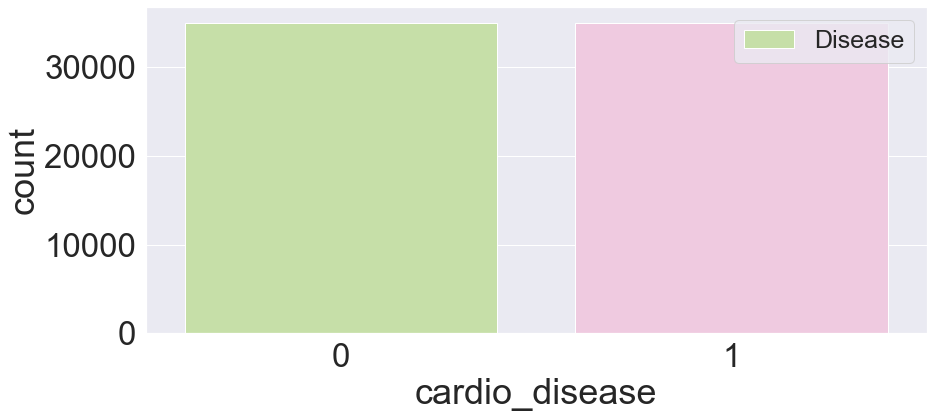

In [328]:
sns.countplot(x ='cardio_disease', data = df, palette ="PiYG_r" )
plt.legend(['Disease','No Disease'], fontsize=25)

In [329]:
df.head(3)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,cardio_disease
id,,,,,,,,,,,
0,50,2,110,80,1,1,0,0,1,21,0
1,55,1,140,90,3,1,0,0,1,34,1
2,51,1,130,70,3,1,0,0,0,23,1


 ## Filtering data by POSITIVE and NEGATIVE Heart Disease patient separatively
 

In [330]:
postive_data = df[df['cardio_disease']==1]
postive_data.describe()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,cardio_disease
count,34979.000000,34979.000000,34979.000000,34979.000000,34979.000000,34979.000000,34979.000000,34979.000000,34979.000000,34979.000000,34979.0
mean,54.452014,1.353441,137.212042,109.023929,1.517396,1.277595,0.083736,0.052117,0.789559,28.073501,1.0
std,6.354347,0.478045,191.289607,217.805266,0.776355,0.624617,0.276995,0.222266,0.407627,6.393549,0.0
min,39.000000,1.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.0
25%,50.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,24.000000,1.0
50%,55.000000,1.000000,130.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,27.000000,1.0
75%,59.000000,2.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,31.000000,1.0
max,64.000000,2.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,298.000000,1.0


In [331]:
negative_data = df[df['cardio_disease']==0]
negative_data.describe()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,cardio_disease
count,35021.000000,35021.000000,35021.000000,35021.000000,35021.000000,35021.000000,35021.000000,35021.000000,35021.000000,35021.000000,35021.0
mean,51.231261,1.345707,120.432598,84.251763,1.216527,1.175380,0.092516,0.055424,0.817881,26.057251,0.0
std,6.783206,0.475605,103.550672,152.686959,0.526973,0.509611,0.289757,0.228809,0.385948,5.616881,0.0
min,29.000000,1.000000,-120.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.0
25%,46.000000,1.000000,110.000000,70.000000,1.000000,1.000000,0.000000,0.000000,1.000000,23.000000,0.0
50%,52.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,25.000000,0.0
75%,57.000000,2.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,28.000000,0.0
max,64.000000,2.000000,14020.000000,9800.000000,3.000000,3.000000,1.000000,1.000000,1.000000,237.000000,0.0


In [332]:
df.describe(include = "all")

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,cardio_disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,27.064771,0.499700
std,6.766774,0.476838,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,6.101346,0.500003
min,29.000000,1.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,48.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,23.000000,0.000000
50%,53.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,26.000000,0.000000
75%,58.000000,2.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,30.000000,1.000000
max,64.000000,2.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,298.000000,1.000000


(11.5, -0.5)

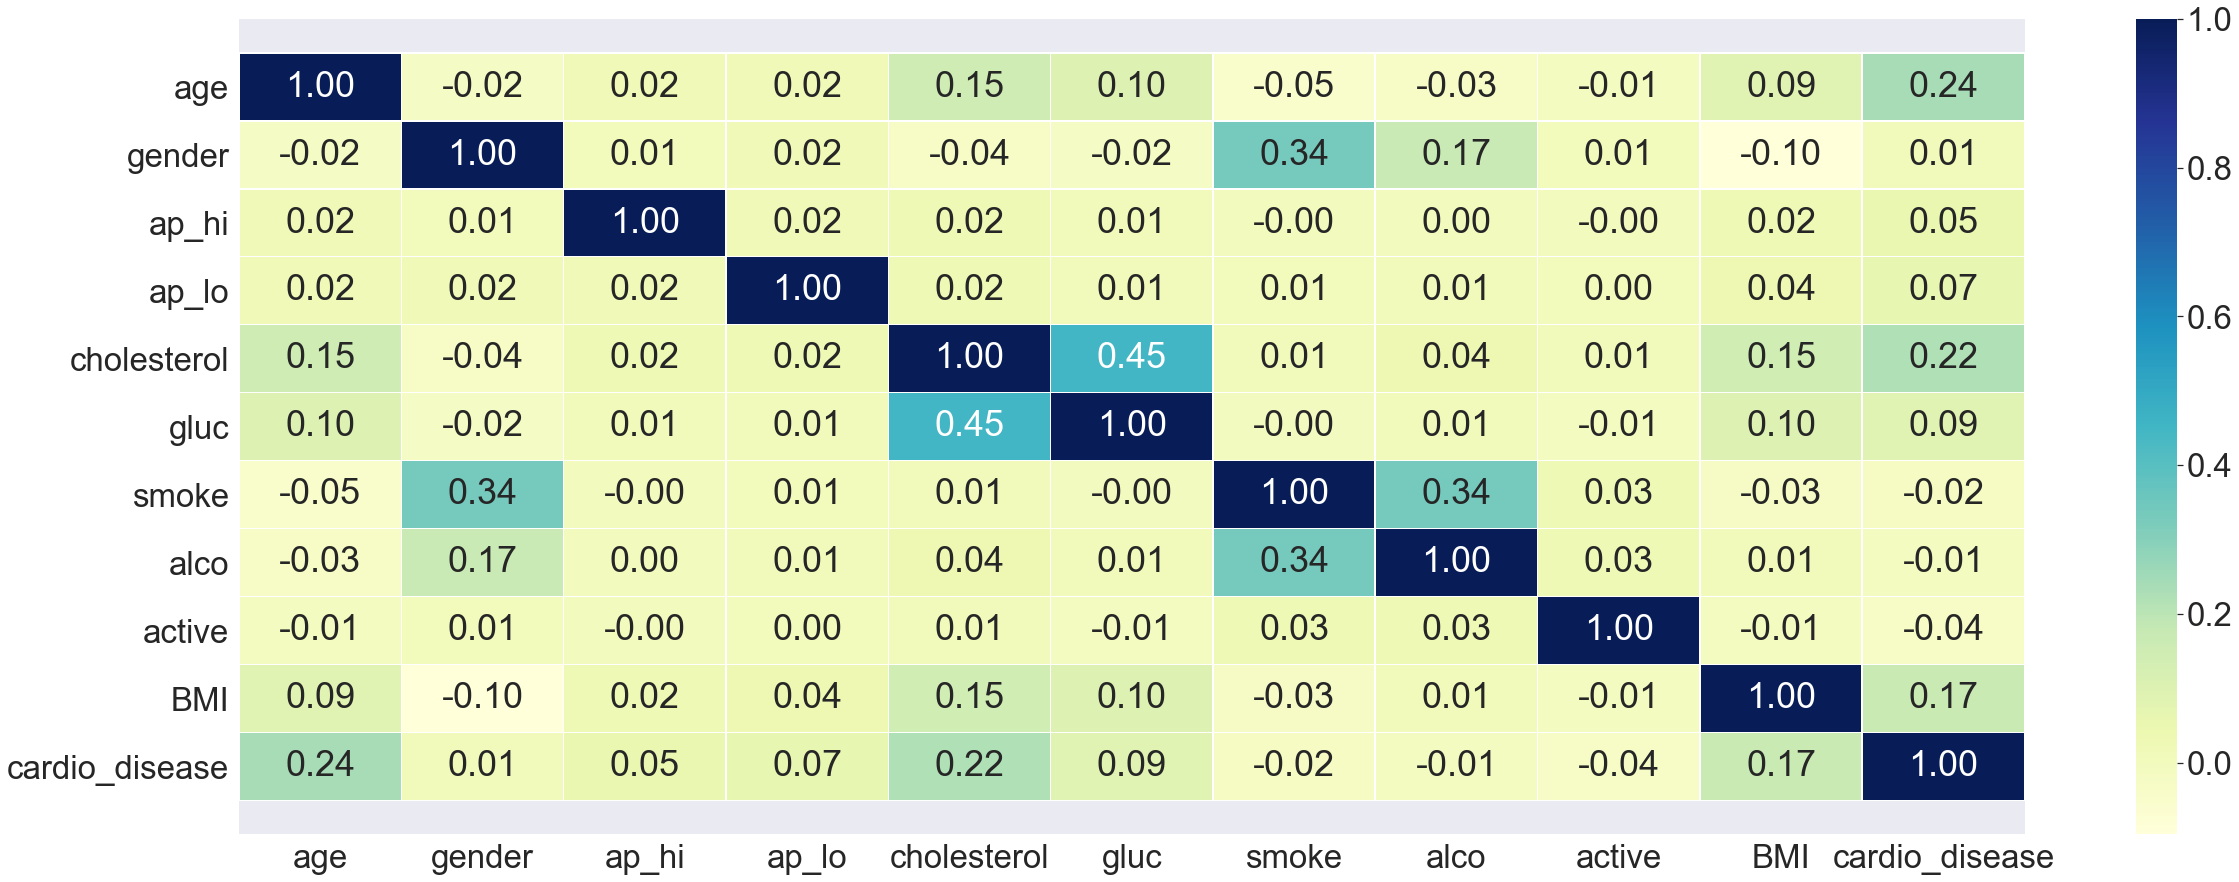

In [333]:
sns.set(font_scale = 3)
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize =(40,15 ) )
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu");
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top-0.5)
 

<AxesSubplot:title={'center':'Correlation with cardio_disease'}>

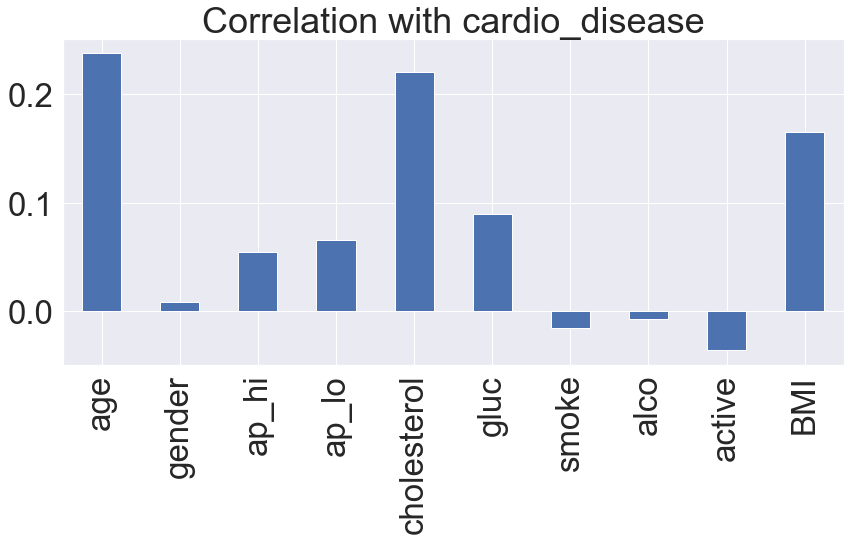

In [334]:


df.drop('cardio_disease', axis=1).corrwith(df.cardio_disease).plot(kind='bar' , grid=True, title="Correlation with cardio_disease")

<AxesSubplot:title={'center':'Correlation with BMI'}>

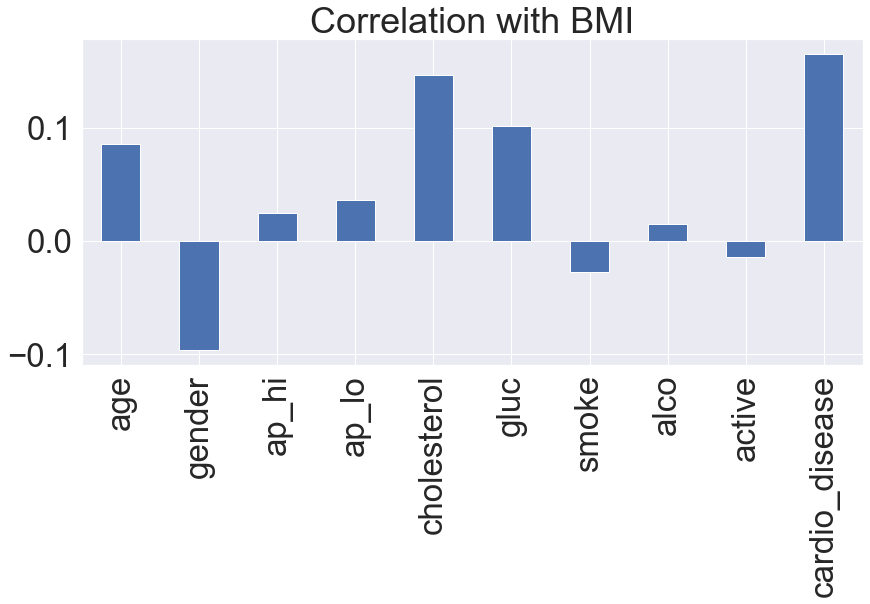

In [335]:
df.drop('BMI', axis=1).corrwith(df.BMI).plot(kind='bar' , grid=True, title="Correlation with BMI")

In [336]:
s=df.groupby(['cholesterol', 'gender'])['cardio_disease'].count()
s.unstack()

gender,1,2
cholesterol,,
1,33570,18815
2,6403,3146
3,5557,2509


Text(0.5, 1.0, 'Sex vs frequency for colesterol')

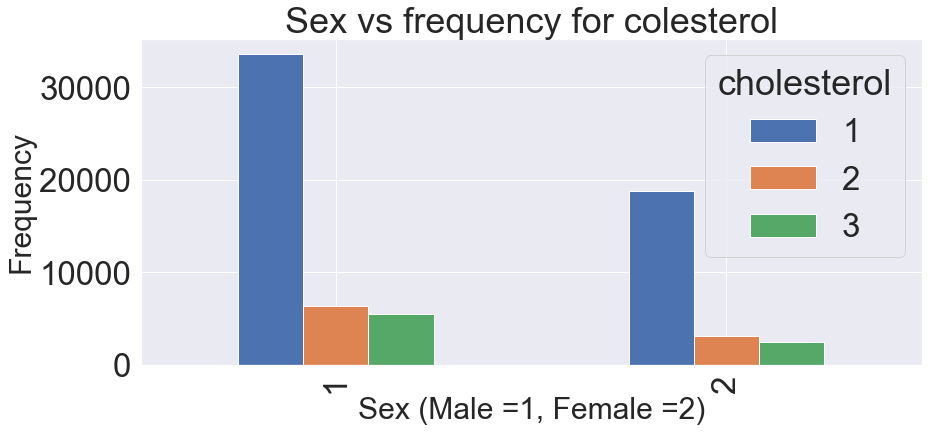

In [337]:
s.unstack().T.plot.bar()

plt.xlabel('Sex (Male =1, Female =2)', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.title('Sex vs frequency for colesterol')


In [338]:
df.head(13)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,cardio_disease
id,,,,,,,,,,,
0,50,2,110,80,1,1,0,0,1,21,0
1,55,1,140,90,3,1,0,0,1,34,1
2,51,1,130,70,3,1,0,0,0,23,1
3,48,2,150,100,1,1,0,0,1,28,1
4,47,1,100,60,1,1,0,0,0,23,0
8,60,1,120,80,2,2,0,0,0,29,0
9,60,1,130,80,3,1,0,0,1,37,0
12,61,2,130,90,3,3,0,0,1,29,1
13,48,1,110,70,1,1,0,0,1,28,0


In [339]:
df.columns

Index(['age', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'BMI', 'cardio_disease'],
      dtype='object')

###  For plotting 

In [340]:
def print_evaluations(ytrue, ypred, model):
    print(f'How does model {model} score:')
    print(f'The accuracy of the model is: {round(accuracy_score(ytrue, ypred), 3)}')
    print(f'The precision of the model is: {round(precision_score(ytrue, ypred), 3)}')
    print(f'The recall of the model is: {round(recall_score(ytrue, ypred), 3)}')
    print(f'The f1-score of the model is: {round(f1_score(ytrue, ypred), 3)}')
    
    #crep= classification_report(y_test, y_pred)
    #print(crep)
    #print(classification_report(y_test, y_pred)) # output accuracy
    #print confusion matrix
    fig = plt.figure(figsize=(10, 10))
    cm = confusion_matrix(ytrue, ypred)
    print(cm)

    #plot the heatmap
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['no disease', 'disease']);
    ax.yaxis.set_ticklabels(['no disease', 'disease'])
    return


In [341]:
X = df.iloc[:,:-1] #all rows (:), and all columns EXCEPT for the last one
y = df['cardio_disease']

# Logistic regression

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      6967
           1       0.75      0.69      0.71      7033

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000

How does model Logistic Regression score:
The accuracy of the model is: 0.724
The precision of the model is: 0.745
The recall of the model is: 0.685
The f1-score of the model is: 0.714
[[5319 1648]
 [2215 4818]]


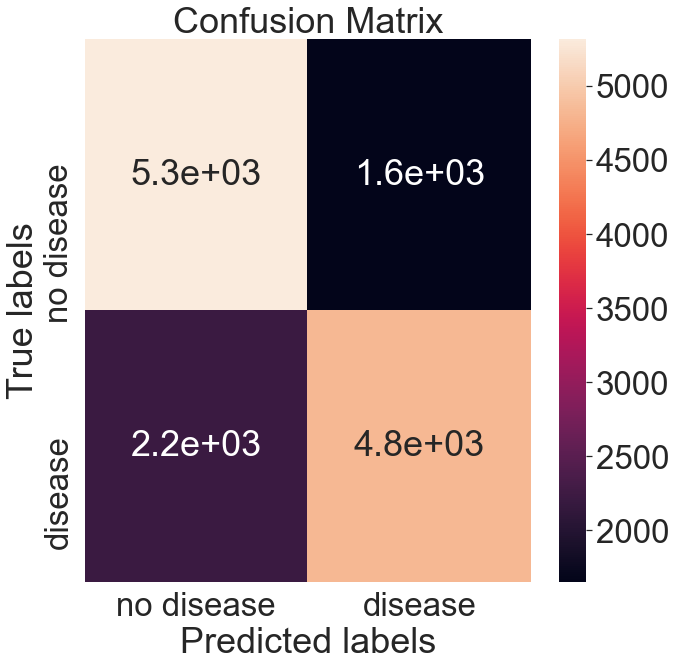

In [342]:
def LogRegfunc(X, y):
        # normalization of the datset
        X = preprocessing.StandardScaler().fit(X).transform(X)

        # Train-and-Test -Split
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 4)
        #X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)

        mlg = LogisticRegression()
        mlg.fit(X_train, y_train)
        scorelg = mlg.score(X_test, y_test)
        y_pred = mlg.predict(X_test)
        clg = mlg.coef_, mlg.intercept_
        glabel=  mlg.predict(X_train)
        prglabel = mlg.predict_proba(X_train)
        return X_test, y_test, y_pred, clg, glabel , prglabel, scorelg,mlg
X_test, y_test, y_pred, clg, glabel , prglabel, scorelg , mlg= LogRegfunc(X, y)
print(classification_report(y_test, y_pred)) # output accuracy
print_evaluations(y_test, y_pred, 'Logistic Regression')


logReg_cm =    confusion_matrix(y_test, y_pred)
logReg_score =    round(mlg.score(X_test,y_test)*100)
 
#logReg_score

## score and cross validation 


In [343]:
(cross_val_score(mlg, X, y, cv=5)).mean() , (cross_val_score(mlg, X, y, cv=5)).std() 

(0.6743285714285715, 0.02101382440981486)

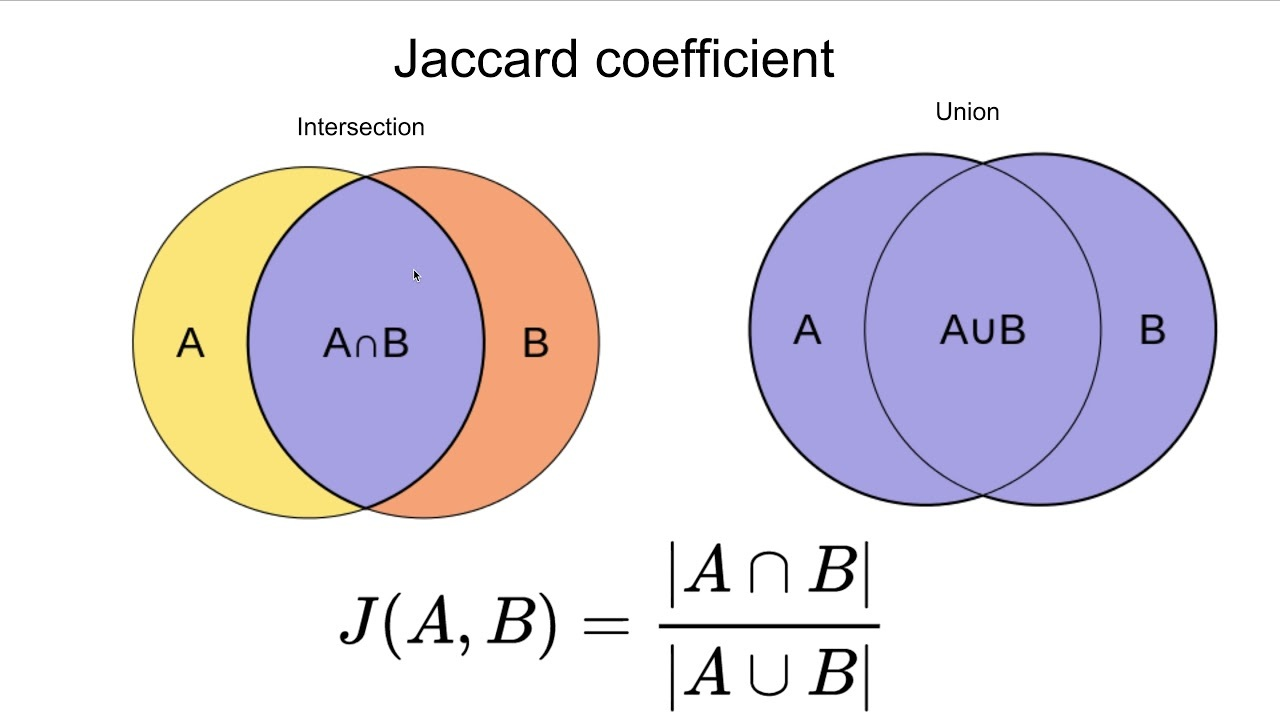

In [344]:
Image(filename='data/Jaccard_sets_A_and_B.svg.png',width=400)

In [345]:
print('Accuracy of the model in jaccard similarity score is = ', jaccard_score(y_test, y_pred))

Accuracy of the model in jaccard similarity score is =  0.5550051837345928


### Logistic regression coefficients 

In [346]:
print('Coeficients', clg)

Coeficients (array([[ 0.35663766,  0.02948248,  6.72449391,  0.03702004,  0.35324545,
        -0.06227896, -0.03227948, -0.04604577, -0.09319742,  0.19501512]]), array([0.11998148]))


# Train the model decison tree

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     26266
           1       0.76      0.68      0.72     26234

    accuracy                           0.73     52500
   macro avg       0.74      0.73      0.73     52500
weighted avg       0.74      0.73      0.73     52500

How does model Decision tree classifier  score:
The accuracy of the model is: 0.733
The precision of the model is: 0.761
The recall of the model is: 0.679
The f1-score of the model is: 0.718
[[20677  5589]
 [ 8410 17824]]


73

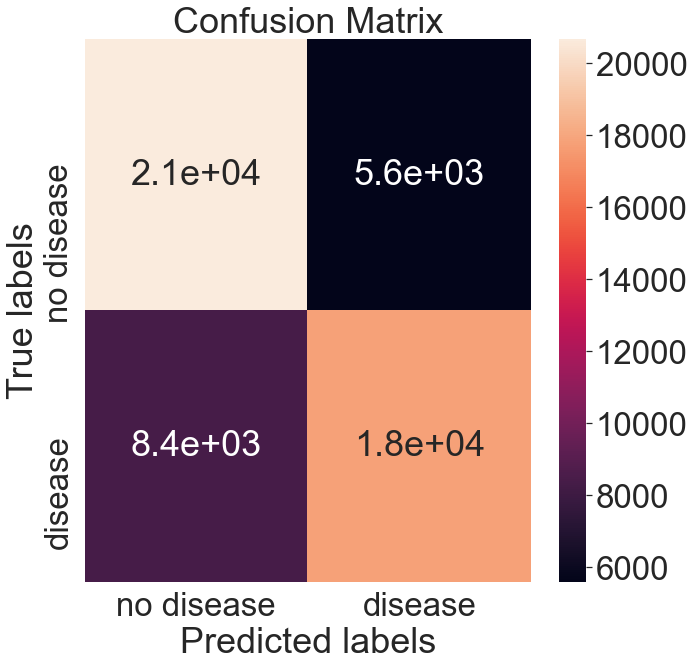

In [347]:
####Decision tree classifier######

def  DecisionTreeCfun(X,y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)
        mtr = DecisionTreeClassifier(max_depth=5)   #Hyperparameters -> there are many more you can try out against overfitting
        mtr.fit(X_train, y_train)
        y_pred = mtr.predict(X_train)   # prediction
        mtr.score(X_train, y_train)
        return X_test, y_test, y_pred, y_train, mtr
    
X_test, y_test, y_pred, y_train, mtr = DecisionTreeCfun(X,y)
print(classification_report(y_train, y_pred)) # output accuracy


print_evaluations(y_train, y_pred, 'Decision tree classifier ')

decisson_Tree_cm =    confusion_matrix(y_train, y_pred)
decisson_Tree_score =  round(mtr.score(X_test,y_test)*100)
decisson_Tree_score

In [348]:
(cross_val_score(mtr, X, y, cv=5)).mean() , (cross_val_score(mtr, X, y, cv=5)).std() 

(0.7312714285714286, 0.00183024477006969)

In [349]:
#print(classification_report(y_test, y_pred)) # output accuracy

In [350]:
df.columns

Index(['age', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'BMI', 'cardio_disease'],
      dtype='object')

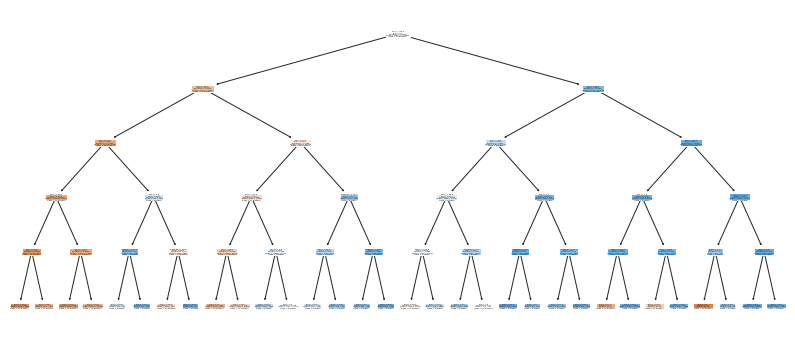

In [351]:
plot_tree(mtr, feature_names=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'], class_names=['no disease','disease'], filled =True  )  ;

# Challenge: Beat Kristians Baseline Model  

In [352]:
df['cardio_disease'].value_counts() 

0    35021
1    34979
Name: cardio_disease, dtype: int64

In [353]:
35021+34979

70000

### super primitive output "all have diseases"

In [354]:
prediction=[0]*70000   ###super primitive output "all have diseases"

In [355]:
correct = 35021
total = 35021+34979

accuracy = correct/total
accuracy, total

(0.5003, 70000)

### second base line model: super primitive 'coin toss model'

In [356]:
prediction =[random.choice([0,1]) for i in range (70000)]

In [357]:
accuracy_score(df['cardio_disease'], prediction)

0.49905714285714287

## Building the baseline model

In [358]:
def baseline(X,y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)
        ypred_baseline = [1] * len(y_train.values)
        return ypred_baseline,y_train

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     26266
           1       0.50      1.00      0.67     26234

    accuracy                           0.50     52500
   macro avg       0.25      0.50      0.33     52500
weighted avg       0.25      0.50      0.33     52500

How does model Baseline Model score:
The accuracy of the model is: 0.5
The precision of the model is: 0.5
The recall of the model is: 1.0
The f1-score of the model is: 0.666
[[    0 26266]
 [    0 26234]]


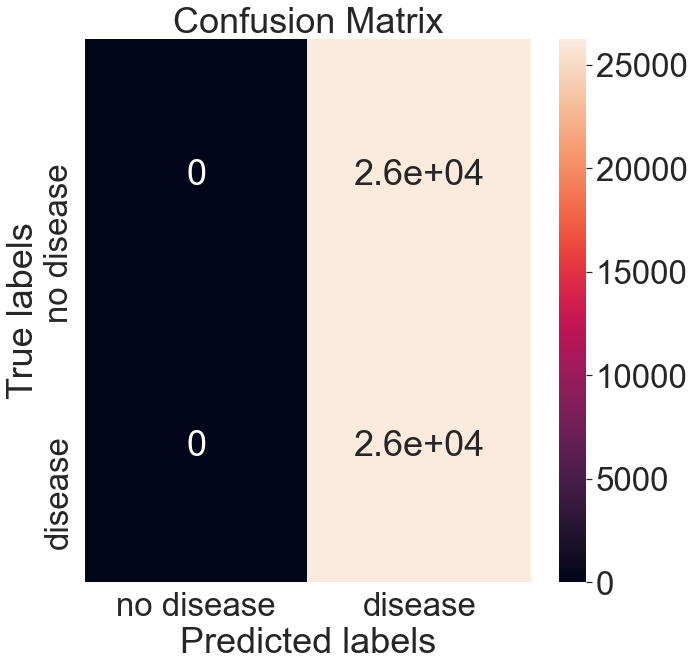

In [359]:
ypred_baseline,y_train = baseline(X,y)
#generating predictions of all ones, i.e. the model guesses  DISEASES  for all cases.
print(classification_report(y_train, ypred_baseline)) # output accuracy
print_evaluations(y_train, ypred_baseline, 'Baseline Model')

## Compare it to a random forest classifier

In [360]:
rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.68      0.82      0.74      8755
           1       0.77      0.62      0.69      8745

    accuracy                           0.72     17500
   macro avg       0.73      0.72      0.72     17500
weighted avg       0.73      0.72      0.72     17500

How does model RandomForest score:
The accuracy of the model is: 0.718
The precision of the model is: 0.772
The recall of the model is: 0.618
The f1-score of the model is: 0.686
[[7159 1596]
 [3341 5404]]


73

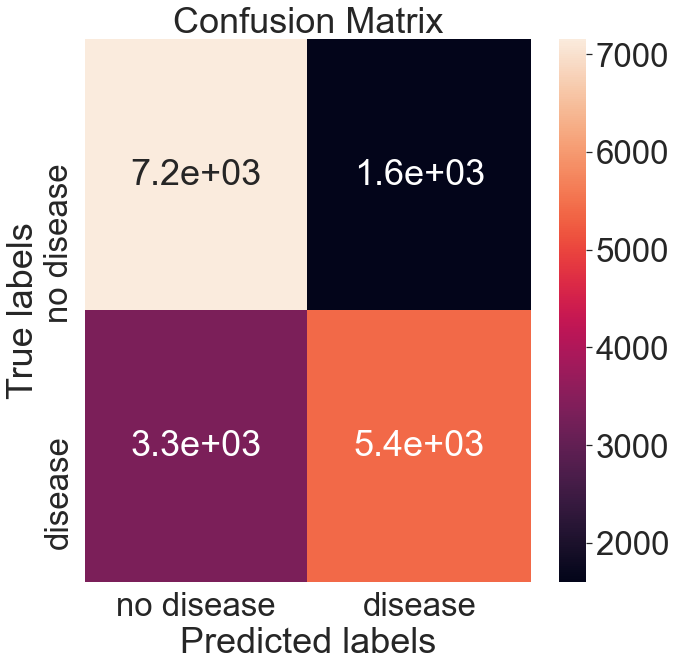

In [361]:
def RandomForestfunc(X,y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)
        rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=10)
        rf.fit(X_train, y_train)
        ypred_rf = rf.predict(X_test)
        cv_all = cross_val_score(rf,X_train, y_train, cv=5, scoring='accuracy') #cv=k=no. of folds =Her Hreuz
        training_score = rf.score(X_train,y_train)
        return ypred_rf,X_test, y_test, cv_all, training_score
ypred_rf, X_test, y_test, cv_all , training_score = RandomForestfunc(X,y)
print(classification_report(y_test, ypred_rf)) # output accuracy
print_evaluations(y_test, ypred_rf, 'RandomForest')

random_forest_cm =    confusion_matrix(y_test, ypred_rf)
random_forest_score =   round(mtr.score(X_test,y_test)*100)
random_forest_score

In [362]:
 (cross_val_score(rf, X, y, cv=5)).mean() , (cross_val_score(rf, X, y, cv=5)).std() 

(0.7178285714285714, 0.00387050595226655)

# Methods to improve: Use Undersampling

In [363]:
(y_train == 0).sum(), (y_train == 1).sum()

(26266, 26234)

How does model Random Undersampling score:
The accuracy of the model is: 0.715
The precision of the model is: 0.709
The recall of the model is: 0.727
The f1-score of the model is: 0.718
[[6145 2610]
 [2386 6359]]


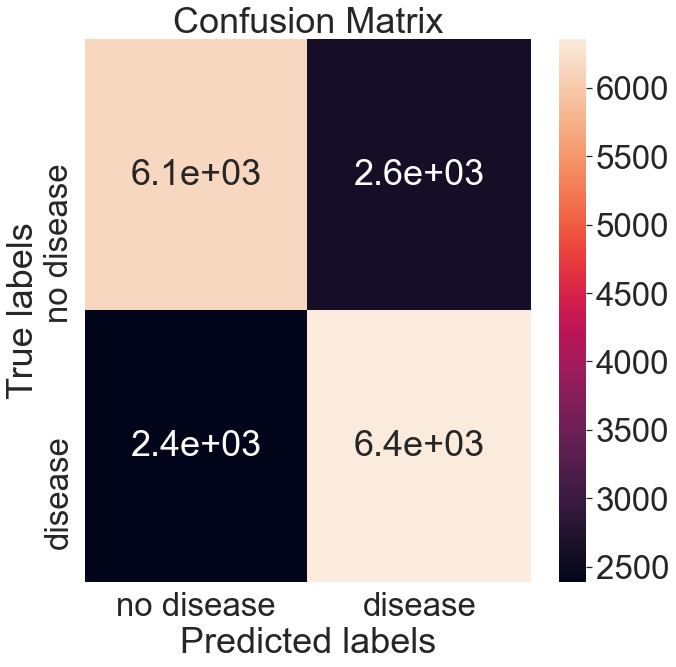

In [364]:
def  RanSamplerfunc(X,y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)
        #print((y_train == 0).sum(), (y_train == 1).sum())
        rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=10)


        rus = RandomUnderSampler(sampling_strategy={0:20000},random_state=10)
        #This is  modified depending on the number of samples
        # we are asking for 95 data points out of 103 in the first class. ## (y_train == 0).sum(), (y_train == 1).sum()

        nm = NearMiss(sampling_strategy={0: 20000}) ####  This is modified depending on the number of samples.
                                                ####(y_train == 0).sum(), (y_train == 1).sum()


        X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
        #fit_resample() new imblearn syntax
        #very conceptually similar to .fit_transform() <---sklearn

        X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)


        ### Exact same code as before, but this time we are training the Random Forest on the undersampled  / down-sampled
        rf.fit(X_train_rus, y_train_rus)
        ypred_rus = rf.predict(X_test)

        
        cv_all = cross_val_score(rf,X_train, y_train, cv=5, scoring='accuracy') #cv=k=no. of folds =Her Hreuz
        training_score = rf.score(X_train,y_train)

        return ypred_rus, y_test, X_train_nm, y_train_nm, X_test, X_train, cv_all, training_score
ypred_rus, y_test, X_train_nm, y_train_nm, X_test , X_train, cv_all, training_score =RanSamplerfunc(X,y)
print_evaluations(y_test, ypred_rus, 'Random Undersampling')


In [365]:
#cv_all, cv_all.mean(), training_score

#  Near Miss

How does model Near Miss score:
The accuracy of the model is: 0.712
The precision of the model is: 0.706
The recall of the model is: 0.724
The f1-score of the model is: 0.715
[[6119 2636]
 [2412 6333]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      8755
           1       0.71      0.72      0.72      8745

    accuracy                           0.71     17500
   macro avg       0.71      0.71      0.71     17500
weighted avg       0.71      0.71      0.71     17500



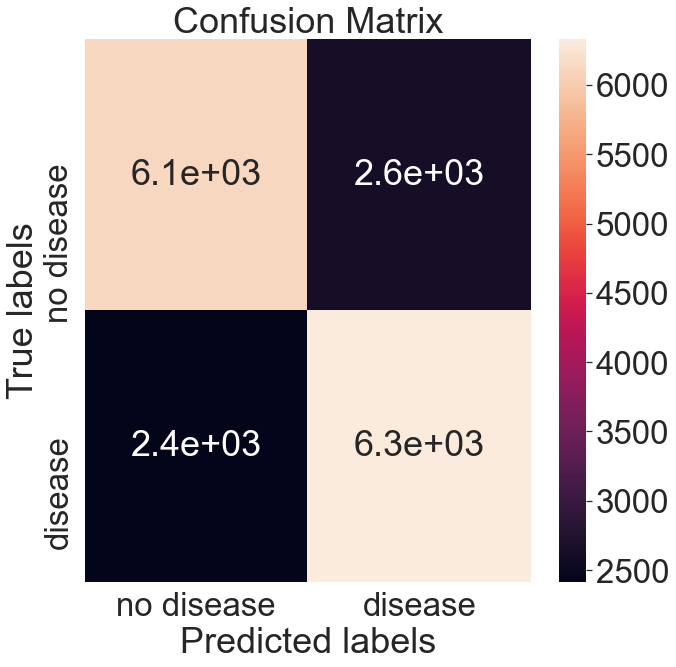

In [366]:
rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=10)
rf.fit(X_train_nm, y_train_nm)
ypred_nm = rf.predict(X_test)        

cv_all = cross_val_score(rf,X_train, y_train, cv=5, scoring='accuracy') #cv=k=no. of folds =Her Hreuz
training_score = rf.score(X_train,y_train)



print_evaluations(y_test, ypred_nm, 'Near Miss')
print(classification_report(y_test, ypred_nm)) # output accuracy

In [367]:
#cv_all, cv_all.mean(), training_score

#  Over samplimng  SMOTE 

26266 26234
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8755
           1       0.50      1.00      0.67      8745

    accuracy                           0.50     17500
   macro avg       0.25      0.50      0.33     17500
weighted avg       0.25      0.50      0.33     17500

How does model Random Oversampling score:
The accuracy of the model is: 0.5
The precision of the model is: 0.5
The recall of the model is: 1.0
The f1-score of the model is: 0.666
[[   0 8755]
 [   0 8745]]


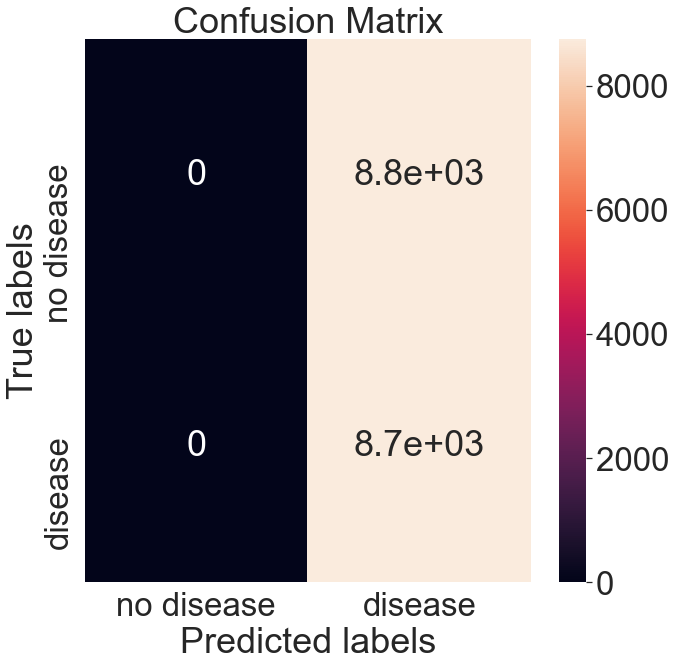

In [368]:

def  OverSamplerfunc(X,y,rf):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)
        print((y_train == 0).sum(), (y_train == 1).sum())
        ros= RandomOverSampler(random_state=10,sampling_strategy={1:100000})
        #up-sampling--- the minority class to have 100000  instead

        X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
        # Exact same code as before, but this time we are training
        #cthe Random Forest on the undersampled  / down-sampled data using Near Miss

        rf.fit(X_train_ros, y_train_ros)
        ypred_ros = rf.predict(X_test)
        
        
        cv_all = cross_val_score(rf,X_train, y_train, cv=5, scoring='accuracy') #cv=k=no. of folds =Her Hreuz
        training_score = rf.score(X_train,y_train)
        
        
        return ypred_ros, y_test,  cv_all, training_score 
ypred_ros, y_test,  cv_all, training_score = OverSamplerfunc(X,y,rf)

print(classification_report(y_test, ypred_ros)) # output accuracy


print_evaluations(y_test, ypred_ros, 'Random Oversampling')



In [369]:
cv_all, cv_all.mean(), training_score

(array([0.72095238, 0.71495238, 0.71952381, 0.71590476, 0.71561905]),
 0.7173904761904761,
 0.4996952380952381)

In [370]:
df.shape

(70000, 11)

# Naives Bayes Classifier

              precision    recall  f1-score   support

           0       0.56      0.90      0.69      7069
           1       0.72      0.27      0.39      6931

    accuracy                           0.59     14000
   macro avg       0.64      0.58      0.54     14000
weighted avg       0.64      0.59      0.54     14000

How does model NBC score:
The accuracy of the model is: 0.588
The precision of the model is: 0.724
The recall of the model is: 0.27
The f1-score of the model is: 0.394
[[6356  713]
 [5057 1874]]


59

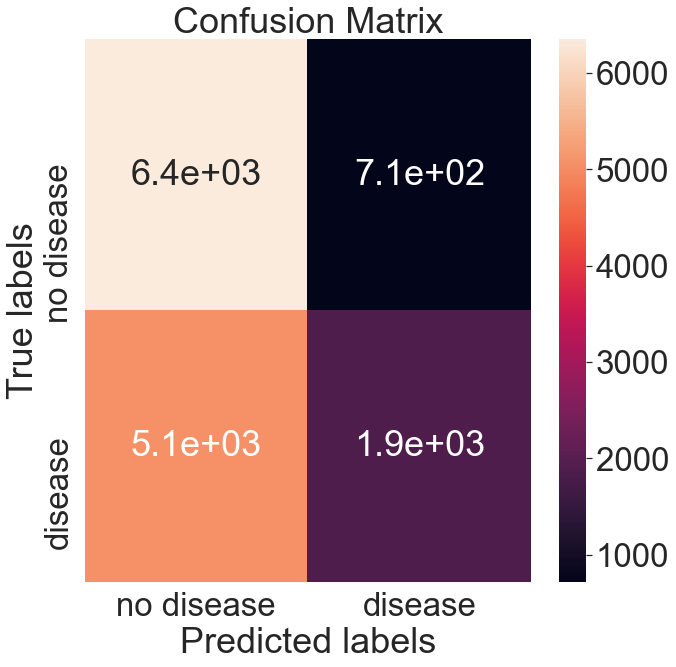

In [371]:
def  Naives_Bayes_classifier(X,y):
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    model_nbc = GaussianNB() # get instance of model
    model_nbc.fit(X_train, y_train) # Train/Fit model 
    y_pred_nbc = model_nbc.predict(X_test) # get y predictions
    X_test_nbc = X_test
    y_test_nbc =y_test
    
    return X_test_nbc, y_test_nbc, y_pred_nbc, model_nbc

X_test_nbc, y_test_nbc, y_pred_nbc, model_nbc = Naives_Bayes_classifier(X,y)
print(classification_report(y_test_nbc, y_pred_nbc)) # output accuracy
print_evaluations(y_test_nbc, y_pred_nbc, 'NBC')

Naives_Bayes_cm =    confusion_matrix(y_test_nbc, y_pred_nbc)
Naives_Bayes_score =  round(model_nbc.score(X_test_nbc,y_test_nbc)*100)
Naives_Bayes_score

In [372]:
(cross_val_score(model_nbc, X, y, cv=5)).mean() , (cross_val_score(model_nbc, X, y, cv=5)).std() 

(0.5898285714285715, 0.0030774359855077144)

# SVM (Support Vector Machine)


              precision    recall  f1-score   support

           0       0.72      0.77      0.74      7069
           1       0.74      0.69      0.72      6931

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000

How does model SVM score:
The accuracy of the model is: 0.728
The precision of the model is: 0.743
The recall of the model is: 0.691
The f1-score of the model is: 0.716
[[5411 1658]
 [2143 4788]]


73

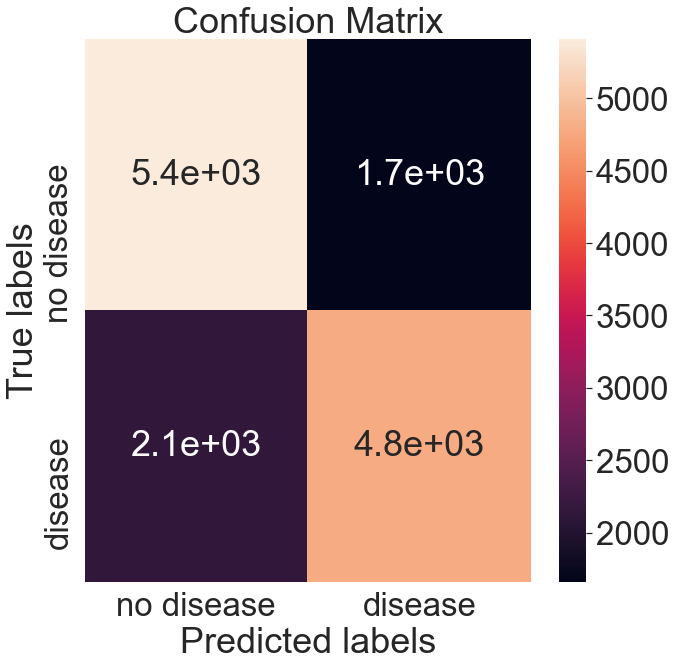

In [373]:
def SupportVectorMachine(X,y):
    #splity X and y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    model_svm = SVC(random_state=1) # get instance of model
    model_svm.fit(X_train, y_train) # Train/Fit model 
    
    y_pred_svm = model_svm.predict(X_test) # get y predictions
    X_test_svm =X_test
    y_test_svm =  y_test
    return X_test_svm, y_test_svm,  y_pred_svm, model_svm

X_test_svm, y_test_svm,  y_pred_svm, model_svm= SupportVectorMachine(X,y)

print(classification_report(y_test_svm, y_pred_svm)) # output accuracy
print_evaluations(y_test_svm, y_pred_svm, 'SVM') 

SupportVectorMachine_cm =    confusion_matrix(y_test_nbc, y_pred_nbc)
SupportVectorMachine_score =  round(model_svm.score(X_test_svm, y_test_svm)*100)
SupportVectorMachine_score

In [374]:
(cross_val_score(model_svm, X, y, cv=5)).mean() , (cross_val_score(model_svm, X, y, cv=5)).std() 

(0.7206142857142858, 0.003388636472514754)

#  K-NN (K-Nearest Neighbors)

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      7069
           1       0.71      0.64      0.67      6931

    accuracy                           0.69     14000
   macro avg       0.69      0.69      0.69     14000
weighted avg       0.69      0.69      0.69     14000

How does model K-NN score:
The accuracy of the model is: 0.691
The precision of the model is: 0.708
The recall of the model is: 0.638
The f1-score of the model is: 0.672
[[5246 1823]
 [2506 4425]]


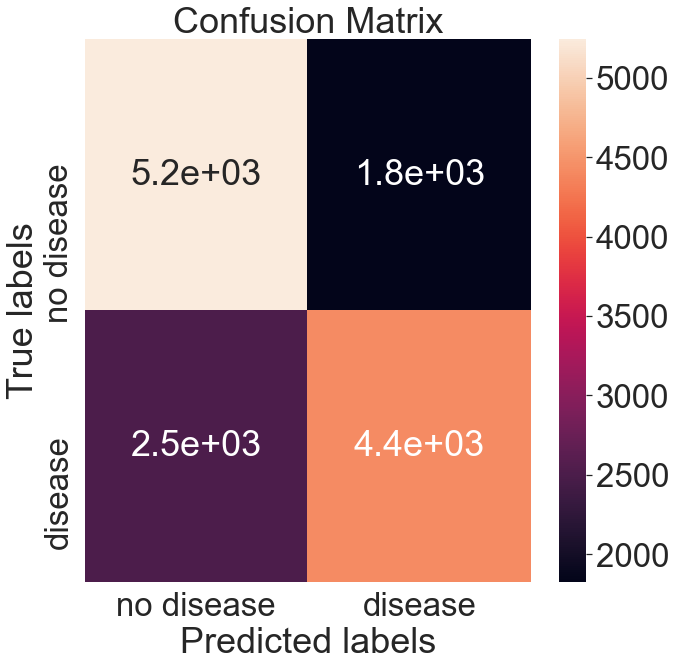

In [386]:
def  K_NEAREST_NEIGHBORS_classifier(X,y):
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    model_knn = KNeighborsClassifier(n_neighbors = 30, p=2, metric= 'euclidean') # get instance of model
    model_knn.fit(X_train, y_train) # Train/Fit model 
    y_pred_knn = model_knn.predict(X_test) # get y predictions
    X_test_knn = X_test
    y_test_knn =  y_test
    return X_test_knn,  y_test_knn, y_pred_knn, model_knn
X_test_knn, y_test_knn, y_pred_knn , model_knn  =   K_NEAREST_NEIGHBORS_classifier(X,y)
print(classification_report(y_test_knn, y_pred_knn)) # output accuracy  
print_evaluations(y_test_knn, y_pred_knn, 'K-NN')


K_NEAREST_NEIGHBORS_cm =    confusion_matrix(y_test_knn, y_pred_knn)
K_NEAREST_NEIGHBORS_score =  round(model_knn.score(X_test_knn, y_test_knn)*100)

In [387]:
K_NEAREST_NEIGHBORS_score

69

In [388]:
(cross_val_score(model_knn, X, y, cv=5)).mean() , (cross_val_score(model_knn, X, y, cv=5)).std() 

(0.7272285714285716, 0.002809023361401252)

In [378]:
df.shape

(70000, 11)

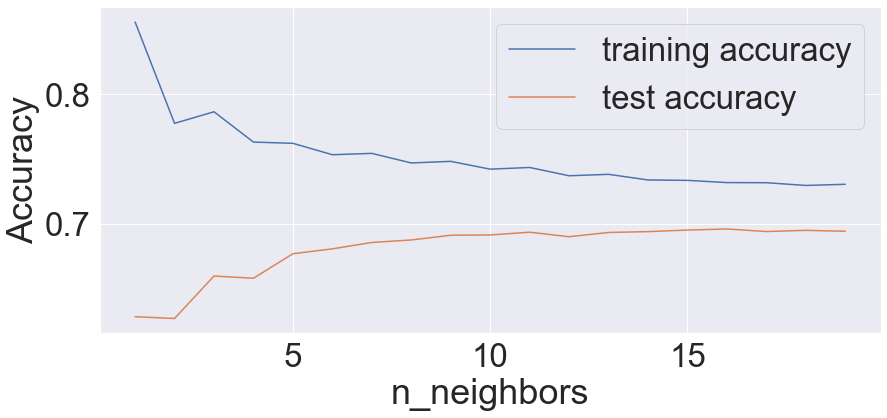

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

# Artificial Nueral Network (ANN) 

In [380]:
def     ANN_func(X,y):
        K.clear_session() 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)


        # keras model



        model = Sequential()
        model.add(Dense(activation = "elu", input_dim = 10, units = 10, kernel_initializer = "uniform"))
        model.add(Dense(activation = "elu", units =9 , kernel_initializer = "uniform"))
        model.add(Dense(activation = "sigmoid", units = 1, kernel_initializer = "uniform"))
        


        model.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ['accuracy'] )

        
        
        
        hist=   model.fit(X_train , y_train , batch_size = 10, epochs =180, validation_split=0.2)

        clsumm = model.summary()
        cleval = model.evaluate(X_train,y_train)
        clpred = model.predict(X_train)
        clgwt  = model.get_weights()
        
        model.save("model.h5")
        print("Saved model to disk")
        network = models.load_model('model.h5')
        X_test_ann = X_test
        y_test_ann = y_test

        y_pred = model.predict(X_test)
        y_pred = (y_pred > 0.5)

        return X_test_ann, y_test_ann, y_pred, hist , cleval, clpred , clgwt,network , model


        y_pred = model.predict(X_test)
   

In [382]:
X_test_ann, y_test_ann, y_pred, hist , cleval, clpred , clgwt,network , model = ANN_func(X,y)

Epoch 1/180
4480/4480 [==============================] - 5s 1ms/step - loss: 0.6044 - accuracy: 0.6833 - val_loss: 0.5598 - val_accuracy: 0.7258
Epoch 2/180
4480/4480 [==============================] - 5s 1ms/step - loss: 0.5671 - accuracy: 0.7242 - val_loss: 0.5586 - val_accuracy: 0.7282
Epoch 3/180
4480/4480 [==============================] - 5s 1ms/step - loss: 0.5644 - accuracy: 0.7241 - val_loss: 0.5572 - val_accuracy: 0.72710s
Epoch 4/180
4480/4480 [==============================] - 4s 958us/step - loss: 0.5658 - accuracy: 0.7232 - val_loss: 0.5558 - val_accuracy: 0.7288
Epoch 5/180
4480/4480 [==============================] - 6s 1ms/step - loss: 0.5566 - accuracy: 0.7302 - val_loss: 0.5528 - val_accuracy: 0.7309
Epoch 6/180
4480/4480 [==============================] - 6s 1ms/step - loss: 0.5610 - accuracy: 0.7255 - val_loss: 0.5509 - val_accuracy: 0.7311
Epoch 7/180
4480/4480 [==============================] - 5s 1ms/step - loss: 0.5557 - accuracy: 0.7270 - val_loss: 0.5493 - va

4480/4480 [==============================] - 5s 1ms/step - loss: 0.5423 - accuracy: 0.7349 - val_loss: 0.5411 - val_accuracy: 0.7369
Epoch 57/180
4480/4480 [==============================] - 4s 919us/step - loss: 0.5459 - accuracy: 0.7300 - val_loss: 0.5399 - val_accuracy: 0.7390
Epoch 58/180
4480/4480 [==============================] - 4s 938us/step - loss: 0.5385 - accuracy: 0.7372 - val_loss: 0.5393 - val_accuracy: 0.7398
Epoch 59/180
4480/4480 [==============================] - 5s 1ms/step - loss: 0.5429 - accuracy: 0.7343 - val_loss: 0.5385 - val_accuracy: 0.7401
Epoch 60/180
4480/4480 [==============================] - 5s 1ms/step - loss: 0.5377 - accuracy: 0.7350 - val_loss: 0.5401 - val_accuracy: 0.7390
Epoch 61/180
4480/4480 [==============================] - 5s 1ms/step - loss: 0.5413 - accuracy: 0.7369 - val_loss: 0.5404 - val_accuracy: 0.7371
Epoch 62/180
4480/4480 [==============================] - 5s 1ms/step - loss: 0.5399 - accuracy: 0.7336 - val_loss: 0.5386 - val_accu

4480/4480 [==============================] - 4s 986us/step - loss: 0.5348 - accuracy: 0.7405 - val_loss: 0.5393 - val_accuracy: 0.7375
Epoch 112/180
4480/4480 [==============================] - 4s 959us/step - loss: 0.5377 - accuracy: 0.7371 - val_loss: 0.5395 - val_accuracy: 0.7391
Epoch 113/180
4480/4480 [==============================] - 5s 1ms/step - loss: 0.5368 - accuracy: 0.7387 - val_loss: 0.5395 - val_accuracy: 0.7372
Epoch 114/180
4480/4480 [==============================] - 5s 1ms/step - loss: 0.5361 - accuracy: 0.7392 - val_loss: 0.5409 - val_accuracy: 0.7330
Epoch 115/180
4480/4480 [==============================] - 5s 1ms/step - loss: 0.5367 - accuracy: 0.7365 - val_loss: 0.5387 - val_accuracy: 0.7362
Epoch 116/180
4480/4480 [==============================] - 4s 884us/step - loss: 0.5372 - accuracy: 0.7398 - val_loss: 0.5394 - val_accuracy: 0.7354
Epoch 117/180
4480/4480 [==============================] - 4s 869us/step - loss: 0.5376 - accuracy: 0.7376 - val_loss: 0.5398 

4480/4480 [==============================] - 4s 886us/step - loss: 0.5377 - accuracy: 0.7368 - val_loss: 0.5394 - val_accuracy: 0.7365
Epoch 166/180
4480/4480 [==============================] - 4s 855us/step - loss: 0.5383 - accuracy: 0.7366 - val_loss: 0.5405 - val_accuracy: 0.7364
Epoch 167/180
4480/4480 [==============================] - 4s 925us/step - loss: 0.5355 - accuracy: 0.7416 - val_loss: 0.5407 - val_accuracy: 0.7372
Epoch 168/180
4480/4480 [==============================] - 4s 905us/step - loss: 0.5425 - accuracy: 0.7329 - val_loss: 0.5398 - val_accuracy: 0.7364
Epoch 169/180
4480/4480 [==============================] - 4s 942us/step - loss: 0.5374 - accuracy: 0.7382 - val_loss: 0.5397 - val_accuracy: 0.7369
Epoch 170/180
4480/4480 [==============================] - 4s 987us/step - loss: 0.5418 - accuracy: 0.7342 - val_loss: 0.5392 - val_accuracy: 0.7364
Epoch 171/180
4480/4480 [==============================] - 4s 987us/step - loss: 0.5433 - accuracy: 0.7321 - val_loss: 0

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      7069
           1       0.76      0.68      0.72      6931

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000

How does model ANN score:
The accuracy of the model is: 0.735
The precision of the model is: 0.757
The recall of the model is: 0.684
The f1-score of the model is: 0.719
[[5552 1517]
 [2193 4738]]


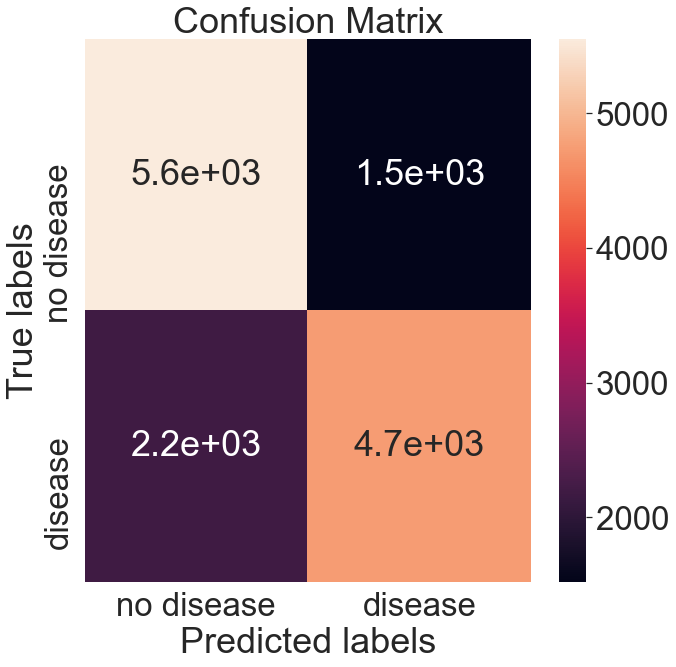

In [383]:
print(classification_report(y_test_ann, y_pred)) # output accuracy
print_evaluations(y_test_ann, y_pred, 'ANN')

   
ANN_cm =    confusion_matrix(y_test_ann, y_pred)
#ANN_score =  round(model(X_test_ann, y_test_ann)*100)
ANN_score = 74

In [ ]:
hist.history

Text(0, 0.5, 'scores')

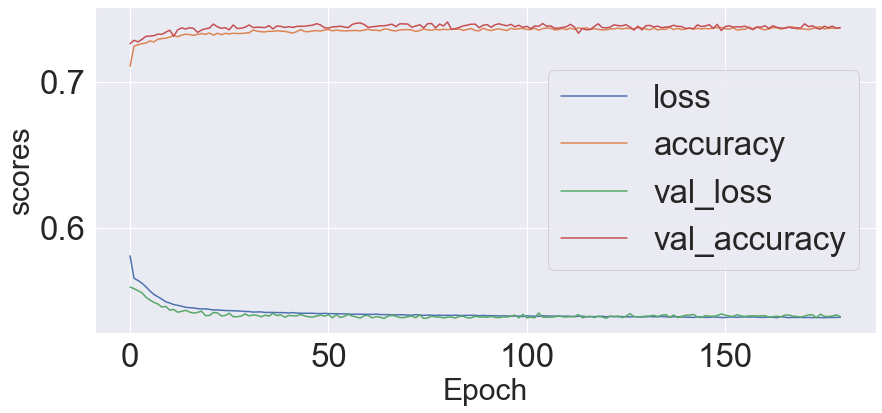

In [389]:
pd.DataFrame(hist.history).plot()
plt.xlabel('Epoch', fontsize=30)
plt.ylabel('scores', fontsize=30)

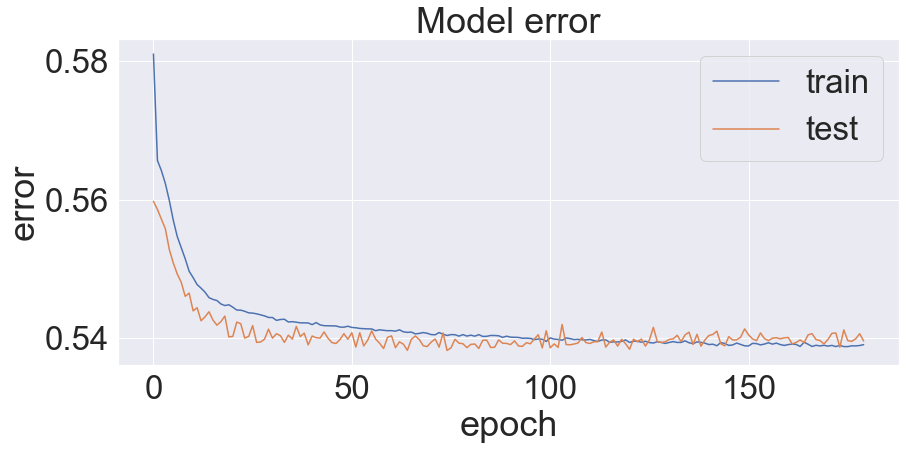

In [390]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

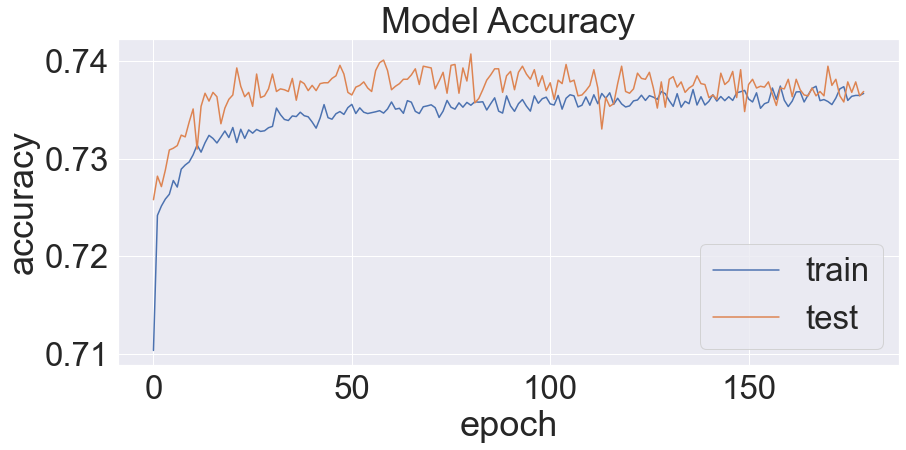

In [391]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [392]:
 network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 99        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 219
Trainable params: 219
Non-trainable params: 0
_________________________________________________________________


# Save a list of np.arrays with the weights

In [393]:
w = network.get_weights()

In [394]:
w

[array([[-8.2579303e-01, -1.1222209e+00, -8.5856378e-01,  4.9851727e-01,
          2.3946689e-02,  5.0210308e-02, -1.0565052e+00,  1.2206739e+00,
          1.6536150e+00,  7.5347617e-02],
        [-8.7537968e-01,  1.1717745e+00,  9.2778213e-02, -4.5881376e-01,
         -1.4869420e-01,  3.3855438e-01, -1.1416111e+00, -1.2465820e+00,
          6.8588603e-01,  2.9965618e-01],
        [ 7.2964940e+00, -2.0678372e+00,  5.1656933e+00,  6.3986807e+00,
         -1.5707904e+01, -1.1354220e+01, -1.7672645e+00, -1.8701489e-01,
          2.7959003e+00,  2.6926277e+00],
        [-1.4581200e+00, -1.3091780e+00, -1.0118059e+00, -1.1010718e+00,
         -5.6434479e+00,  1.3896038e-01, -4.4209690e+00,  2.3558784e-01,
         -2.7621907e-01,  2.9254904e-01],
        [ 6.7474961e-01,  2.8288919e-01,  1.1656483e+00, -2.2228210e+00,
         -1.1090411e-02, -2.1932420e-01, -5.8360541e-01,  3.4920600e-01,
          1.3536141e+00,  1.9755051e+00],
        [-4.1781393e-01,  6.3438952e-01,  7.4804336e-01,  8.

In [395]:
# extract the names of the TF variables
[v.name for v in network.weights]

['dense/kernel:0',
 'dense/bias:0',
 'dense_1/kernel:0',
 'dense_1/bias:0',
 'dense_2/kernel:0',
 'dense_2/bias:0']

In [396]:
w[0].shape

(10, 10)

In [397]:
# Examine the patterns of the weights 

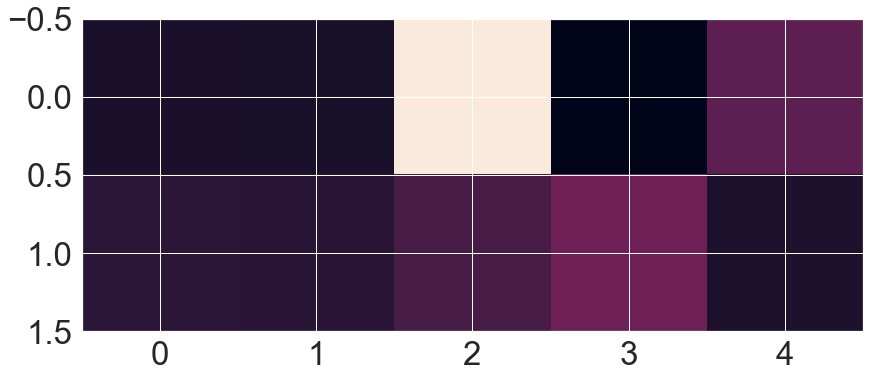

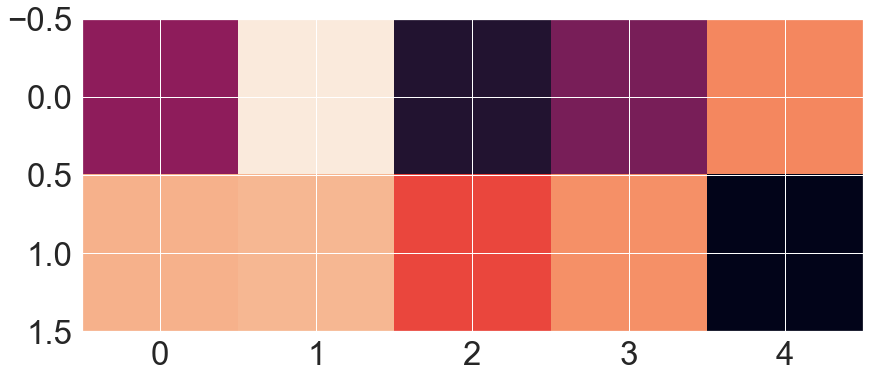

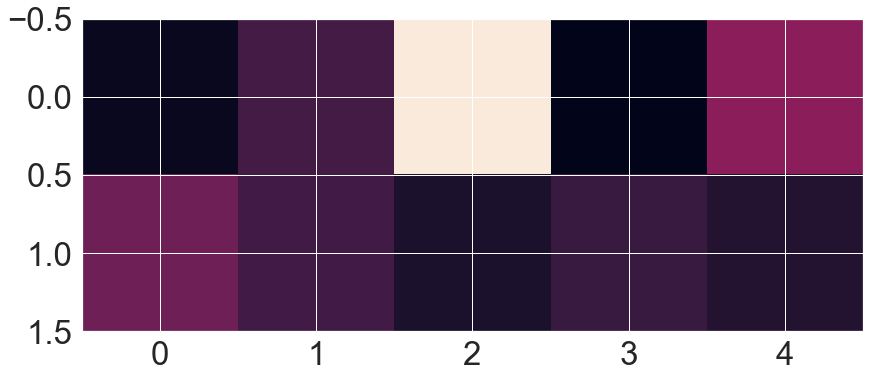

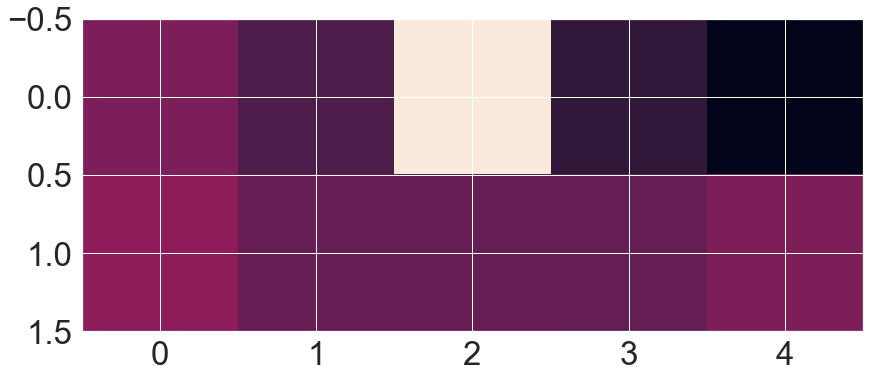

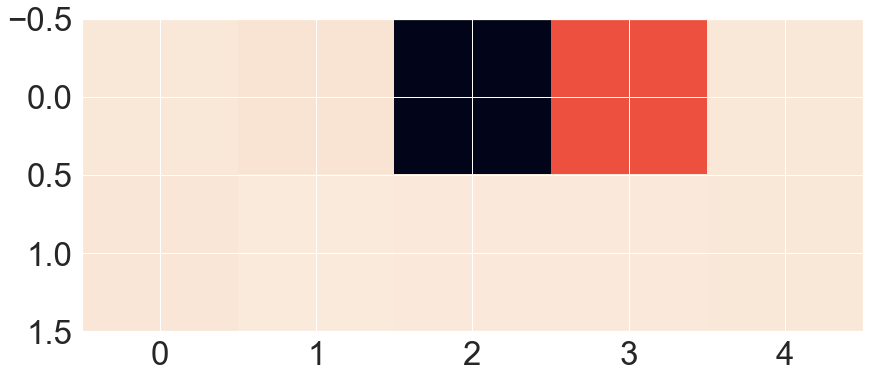

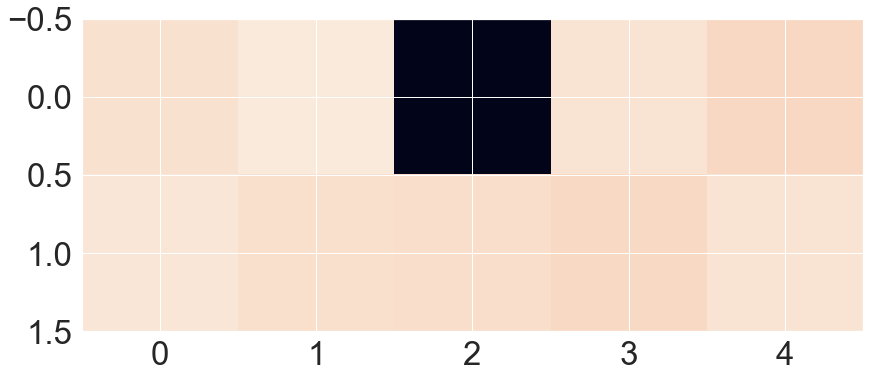

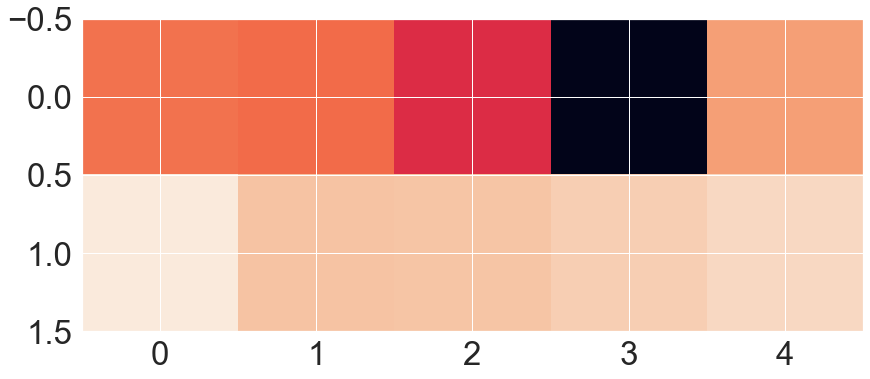

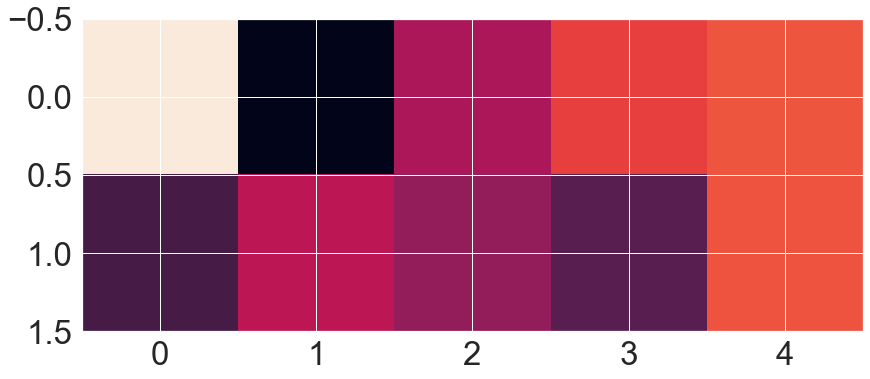

In [398]:
for i in range(8):
    plt.imshow(w[0][:,i].reshape((2, 5)))
    plt.show()

# Drawing a Keras model

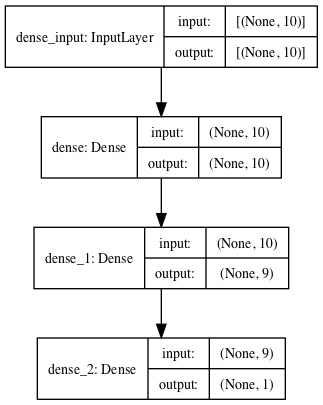

In [399]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Comapring models

In [400]:
models = pd.DataFrame({ 'model':['LReg', 'D_Tree', 'R.For', 
                                 'NB', 'SVN', 'KNN','ANN'], 
                        'score':[logReg_score, decisson_Tree_score, random_forest_score, 
                                 Naives_Bayes_score, SupportVectorMachine_score, K_NEAREST_NEIGHBORS_score, ANN_score]})

mod_scor= models.sort_values('score', ascending=False)

<AxesSubplot:title={'center':'Scores for each model classifier cardio disesease prediction'}, xlabel='model', ylabel='score'>

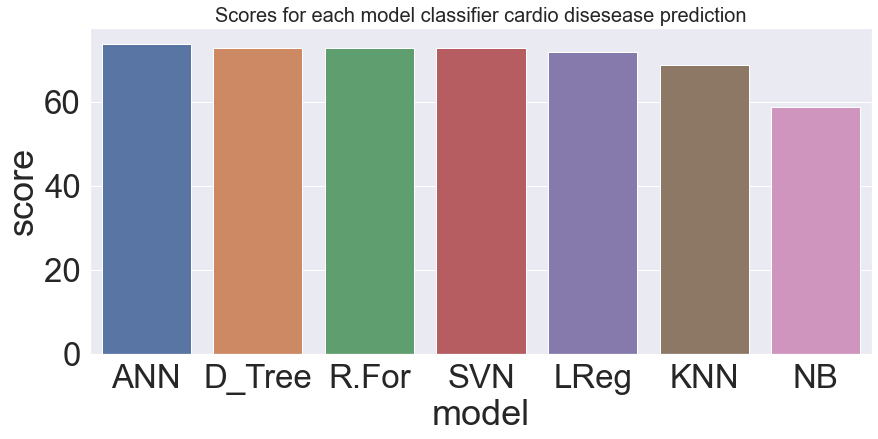

In [402]:
plt.title('Scores for each model classifier cardio disesease prediction', fontsize=20)
sns.barplot(x='model', y ='score', data =mod_scor)

In [384]:
model_all = pd.DataFrame({ 'model':['LReg', 'D_Tree', 'R.For', 'NB', 'SVM', 'KNN','ANN'], 
                        'recall':[69,       68,       62,      27,    69,  66,    69],
                      'precison':[75,       76,       77,      72,   74,   68,     76],
                      'accuracy':[72,       73,       72,      59,    72,  68,    74],  
                     'cross-val':[67,       68,       62,      59,    72,   70,    74],
                         'score':[72,       73,       73,      59,   73,   68,    74],   
                         })
 
model_all.columns

Index(['model', 'recall', 'precison', 'accuracy', 'cross-val', 'score'], dtype='object')